<a href="https://colab.research.google.com/github/Marteldelfer/PISI3/blob/analise-exploratoria/Limpeza_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TMDB

Neste trabalhos usaremos uma base de dados do TMDB para resolver problemas usando Inteligência Artificial. O TMDB é uma base de dados online muito completa que trata sobre filmes.


## Limpeza de dados


Carregando base de dados

In [2]:
''' Importando dependências '''

import pandas as pd


In [37]:
'''Lendo csv'''

# Caminho para o seu arquivo CSV
caminho_csv = 'tmdb.csv'

# Lê o CSV
df = pd.read_csv(caminho_csv)

num_lines = df.shape[0]
print(f'O dataset tem {num_lines} linhas')

print('=-'*30)
print('Os atributos são listados abaixo')
attributes = df.columns.tolist()
for attribute in attributes:
  print(attribute)


O dataset tem 14999 linhas
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Os atributos são listados abaixo
id
title
overview
release_date
runtime
genres
original_language
budget
revenue
popularity
vote_average
vote_count
cast
crew
production_companies
production_countries
poster_path
backdrop_path
tagline
status



Tratando valores faltantes


In [13]:
df_v1 = df.dropna()
df_v1.to_csv('tmdb_v1.csv', index=False)

num_lines = df_v1.shape[0]
print(f'O dataset tem {num_lines} linhas')


O dataset tem 10575 linhas


Retirando os filmes que ainda não foram lançados

In [17]:
df_v2 = df_v1[df['status'] == 'Released']

# Salva o resultado em um novo CSV
df_v2.to_csv('tmdb_v2.csv', index=False)

num_lines = df_v2.shape[0]
print(f'O dataset tem {num_lines} linhas')

<ipython-input-17-61f4a455896c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_v2 = df_v1[df['status'] == 'Released']


O dataset tem 10547 linhas


## Análise de atributos


Note que podemos excluir alguns atributos da análise. Por exemplo, na seção anterior retiramos os filmes que ainda não foram lançados. Assim, o atributo status pode ser retirado da análise.

Além disso, os atributos overview,poster_path,back_drop_path e tagline serão retirados


In [26]:
df_v3 = pd.read_csv('tmdb_v2.csv')

df_v3 = df_v3.drop(columns=['overview','poster_path', 'backdrop_path', 'status', 'tagline'])

df_v3.to_csv('tmdb_v3.csv', index=False)

df_v3.head()

,id,title,release_date,runtime,genres,original_language,budget,revenue,popularity,vote_average,vote_count,cast,crew,production_companies,production_countries
0,1034541,Terrifier 3,2024-10-09,125,"Horror, Thriller, Mystery",en,2000000,78573405,3304.003,6.900,886,"Lauren LaVera, Elliott Fullam, David Howard Th...","Chris McGurk, Phil Falcone, G. Brandon Hill, B...","Cineverse, Bloody Disgusting, Dark Age Cinema,...",United States of America
1,912649,Venom: The Last Dance,2024-10-22,109,"Science Fiction, Action, Adventure",en,120000000,394000000,3930.216,6.385,658,"Tom Hardy, Chiwetel Ejiofor, Juno Temple, Clar...","David Michelinie, Todd McFarlane, Avi Arad, Ke...","Columbia Pictures, Pascal Pictures, Matt Tolma...",United States of America
2,1184918,The Wild Robot,2024-09-12,102,"Animation, Science Fiction, Family",en,78000000,292583746,2214.674,8.500,2721,"Lupita Nyong'o, Pedro Pascal, Kit Connor, Bill...","Dean DeBlois, Chris Sanders, Chris Sanders, Je...",DreamWorks Animation,United States of America
3,933260,The Substance,2024-09-07,141,"Drama, Horror, Science Fiction",en,17500000,46818041,1893.832,7.300,1809,"Demi Moore, Margaret Qualley, Dennis Quaid, Ed...","Matthieu de la Mortière, Anne Juin, Erik Baier...","Working Title Films, Blacksmith","France, United Kingdom"
4,698687,Transformers One,2024-09-11,104,"Animation, Science Fiction, Adventure, Family",en,75000000,124530200,1550.314,8.100,651,"Chris Hemsworth, Brian Tyree Henry, Scarlett J...","Frazer Churchill, Rob Coleman, Stephen King, C...","Paramount Animation, di Bonaventura Pictures, ...",United States of America


Exibindo os atributos


In [32]:
import pandas as pd

# Load the dataframe
df_v3 = pd.read_csv('tmdb_v3.csv')

# Display the attributes and their descriptions in a table
# Get the list of attributes (column names) from the DataFrame
attributes = df_v3.columns.tolist()

# Define descriptions for each attribute, ensuring the list length matches the attributes list
descriptions = [
    'Identificador do filme',
    'Título do filme',
    'Data de lançamento do filme',
    'Tempo de duração',
    'Gêneros do filme',
    'Idioma Original',
    'Custo de produção',
    'Arrecadação do filme',
    'Popularidade do filme',
    'Média do filme',
    'Quantidade de votos',
    'Elenco',
    'Produção',
    'País de produção',
    'Companhias de produção'
]

# Adjust the descriptions list to match the number of attributes
# If descriptions are shorter, add generic placeholders
if len(descriptions) < len(attributes):
    descriptions.extend(['Description not available'] * (len(attributes) - len(descriptions)))
# If descriptions are longer, truncate the list
elif len(descriptions) > len(attributes):
    descriptions = descriptions[:len(attributes)]

# Create a dictionary where keys are attribute names and values are descriptions
attributes_data = {
    'Atributos': attributes,
    'Descrições': descriptions
}

# Create the DataFrame
attributes_df = pd.DataFrame(attributes_data)
print(attributes_df.to_string(index=False))

['id', 'title', 'release_date', 'runtime', 'genres', 'original_language', 'budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'cast', 'crew', 'production_companies', 'production_countries']
           Atributos                  Descrições
                  id      Identificador do filme
               title             Título do filme
        release_date Data de lançamento do filme
             runtime            Tempo de duração
              genres            Gêneros do filme
   original_language             Idioma Original
              budget           Custo de produção
             revenue        Arrecadação do filme
          popularity       Popularidade do filme
        vote_average              Média do filme
          vote_count         Quantidade de votos
                cast                      Elenco
                crew                    Produção
production_companies            País de produção
production_countries      Companhias de produção


                budget   revenue  popularity  vote_average  vote_count  \
budget        1.000000  0.744226    0.213772      0.099450    0.598500   
revenue       0.744226  1.000000    0.225287      0.182437    0.750551   
popularity    0.213772  0.225287    1.000000      0.094865    0.183917   
vote_average  0.099450  0.182437    0.094865      1.000000    0.313764   
vote_count    0.598500  0.750551    0.183917      0.313764    1.000000   
runtime       0.263038  0.227052    0.061504      0.266939    0.241680   

               runtime  
budget        0.263038  
revenue       0.227052  
popularity    0.061504  
vote_average  0.266939  
vote_count    0.241680  
runtime       1.000000  


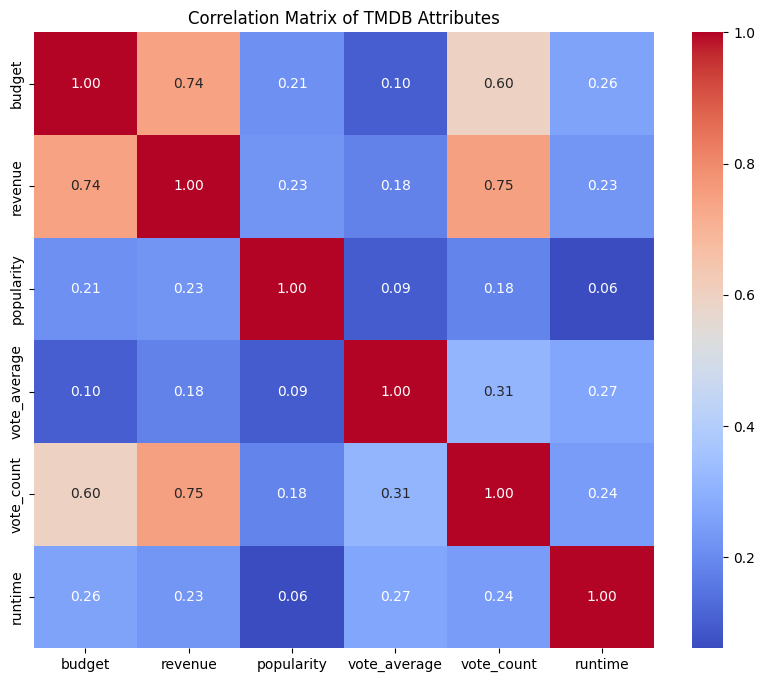

In [33]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe
df_v3 = pd.read_csv('tmdb_v3.csv')

# Select numerical columns for correlation analysis
numerical_cols = ['budget', 'revenue', 'popularity', 'vote_average', 'vote_count', 'runtime']
df_numerical = df_v3[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of TMDB Attributes')
plt.show()
